In [4]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from IPython.display import display

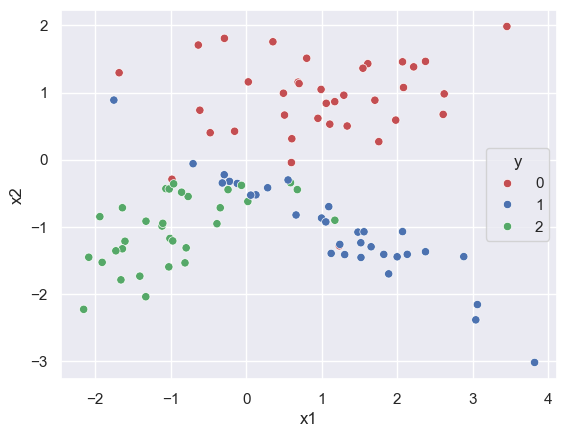

In [5]:
from sklearn import datasets

X, y = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

df=pd.DataFrame(X,columns=['x1', 'x2'])
df['y']=y
df.dtypes
sns.scatterplot(x="x1", y="x2", hue='y', data=df, palette=["r", "b","g"]);

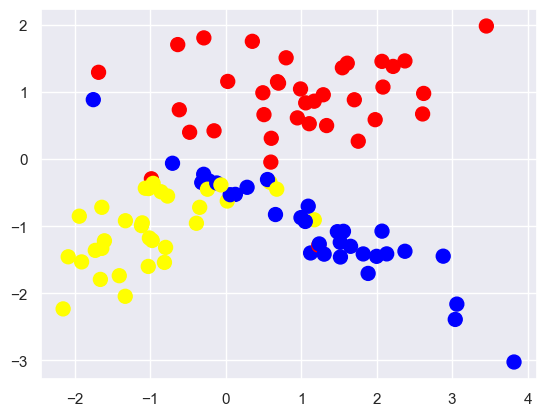

In [6]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
plt.scatter( X[:,0], X[:,1], c=y, cmap=colors, s=100);

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [8]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [9]:
from sklearn import tree
from IPython.display import Image


def tree_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors, light_colors):
    
    #fit model
    cls=estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (10, 5))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = light_colors)
   
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors, edgecolors=['black'])
    plt.title('Train data, accuracy={:.2f}'.format(estimator.score(train_data,train_labels)))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)

    plt.contourf(xx, yy, Z, cmap = light_colors)

    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors, edgecolors=['black'])
    plt.title('Test data, accuracy={:.2f}'.format(estimator.score(test_data,test_labels)))
    plt.show()
    
    tree.plot_tree(estimator, proportion=True, filled = True)
    plt.show()
    
    return

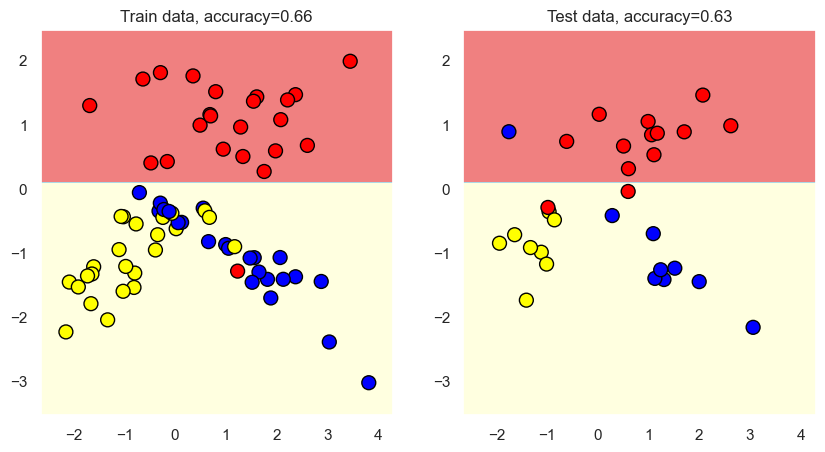

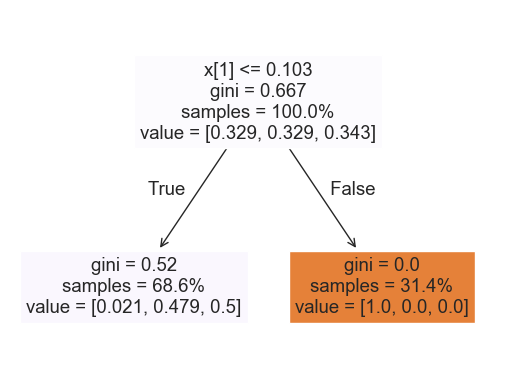

In [10]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state = 1, max_depth = 1)

tree_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

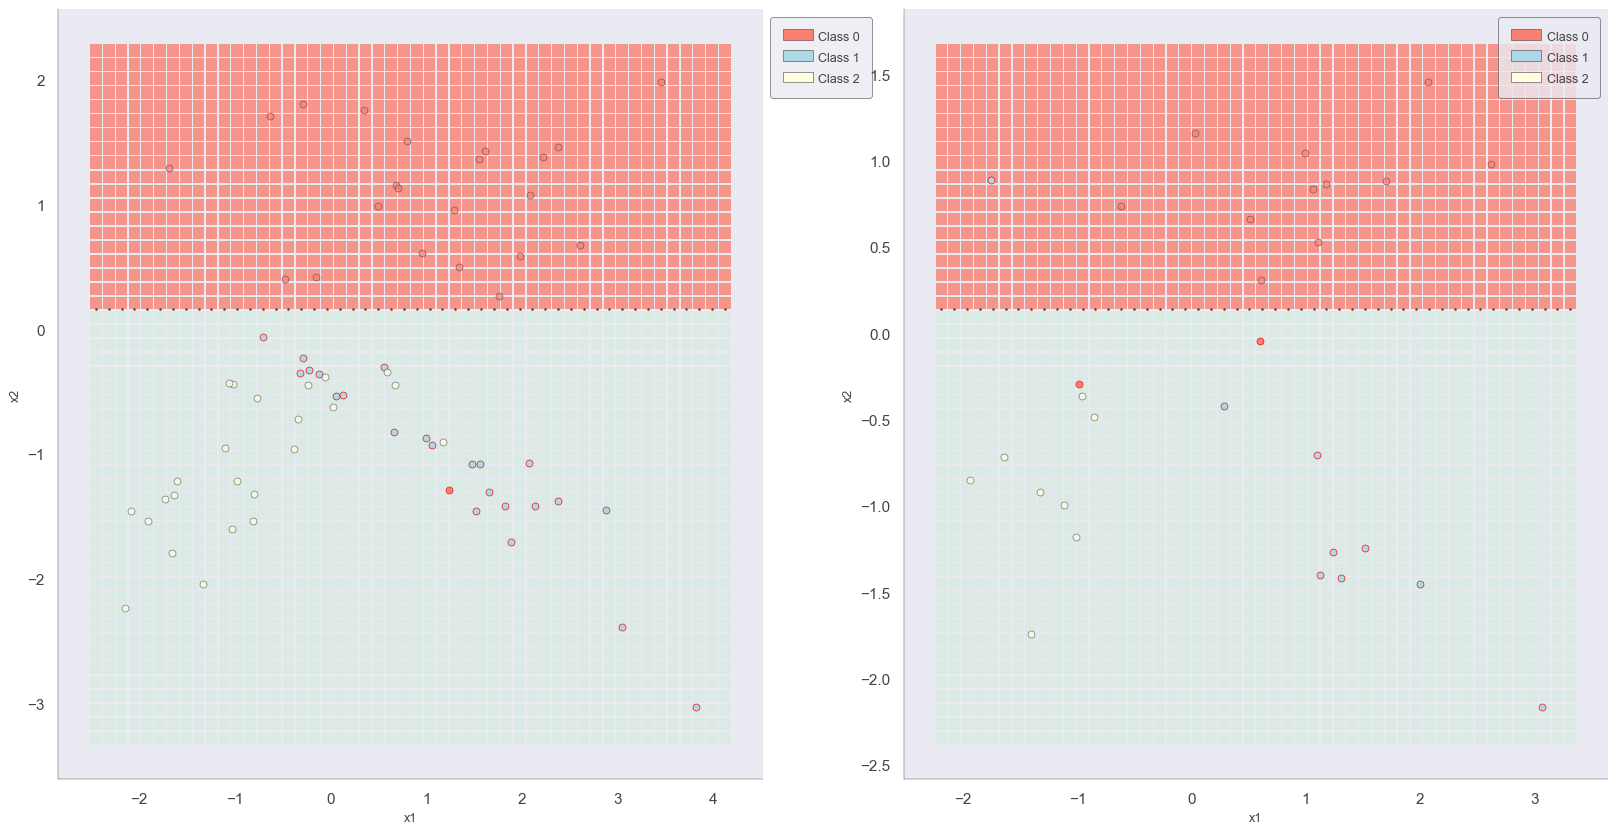

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


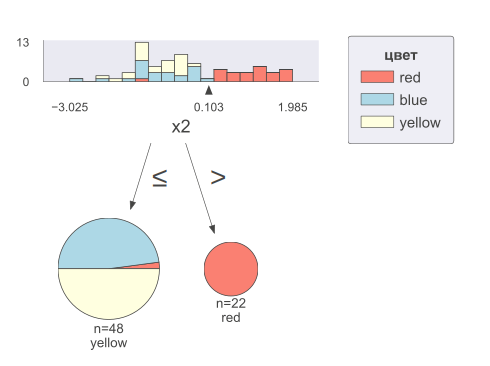

In [11]:
# conda install python-graphviz
# pip install dtreeviz
import dtreeviz

viz_model = dtreeviz.model(estimator,
                           X_train=X_train, y_train=y_train,
                           feature_names=['x1','x2'],
                           target_name = 'цвет', 
                           class_names=['red', 'blue', 'yellow']
                           )
colors_for_up_to_3_classes = [None,  # 0 classes
                              None,  # 1 class
                              None,  # 2 classes
                              ['salmon','lightblue','lightyellow',] # 3 classes
                              ]

fig,axes = plt.subplots(1,2, figsize=(20,10))
dtreeviz.decision_boundaries(estimator, X_train, y_train, ax=axes[0],
       feature_names=['x1', 'x2'],
       colors = {'classes':colors_for_up_to_3_classes}
)

dtreeviz.decision_boundaries(estimator, X_test, y_test, ax=axes[1],
       feature_names=['x1', 'x2'],
       colors = {'classes':colors_for_up_to_3_classes}
)
plt.show()


viz_model.view(scale=2, colors = {'classes':colors_for_up_to_3_classes})

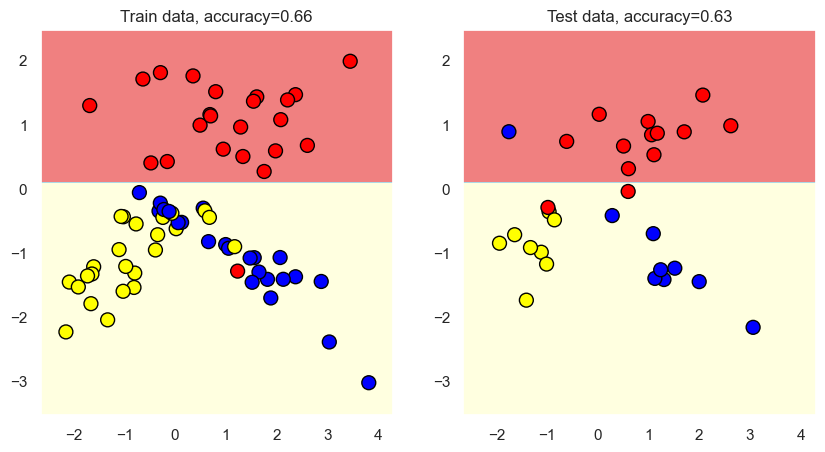

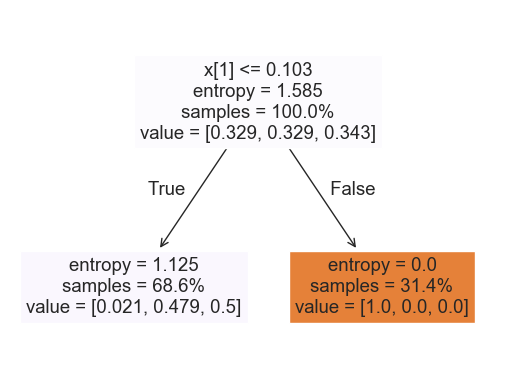

In [12]:
estimator_e = DecisionTreeClassifier(random_state = 1, max_depth = 1, criterion= 'entropy')
tree_decision_surface(estimator_e, X_train, y_train, X_test, y_test, colors, light_colors)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


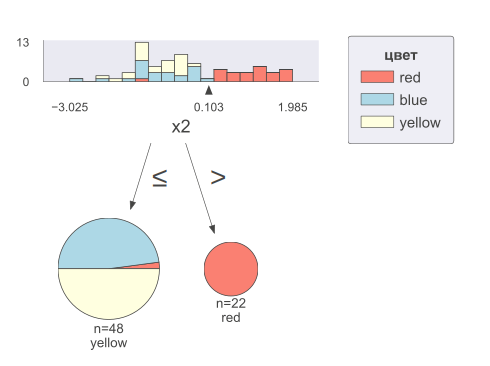

In [13]:
viz_model = dtreeviz.model(estimator_e,
                           X_train=X_train, y_train=y_train,
                           feature_names=['x1','x2'],
                           target_name = 'цвет', 
                           class_names=['red', 'blue', 'yellow']
                           )
viz_model.view(scale=2, colors = {'classes':colors_for_up_to_3_classes})

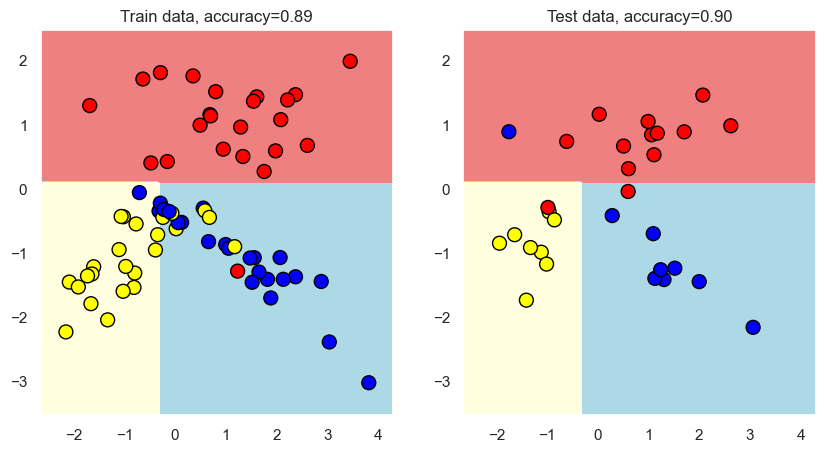

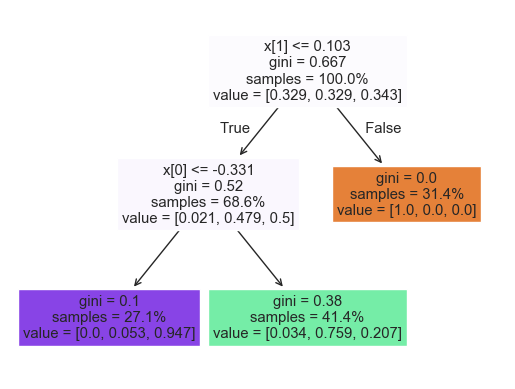

In [14]:
estimator = DecisionTreeClassifier(random_state = 1, max_depth = 2)
tree_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)
plt.show()

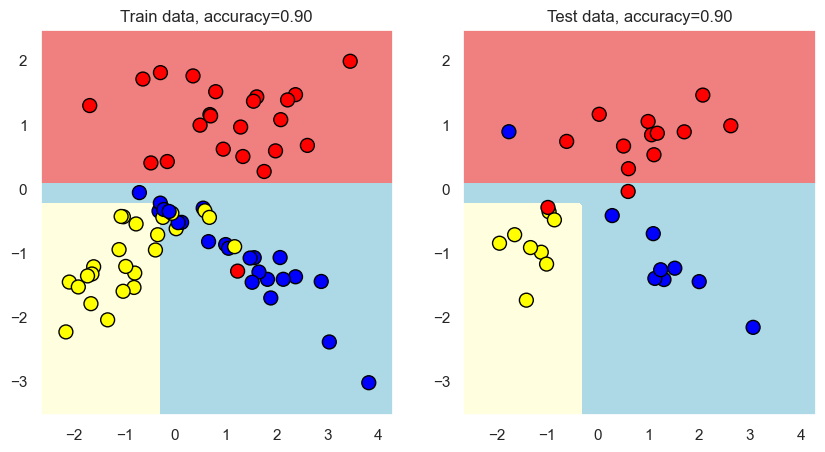

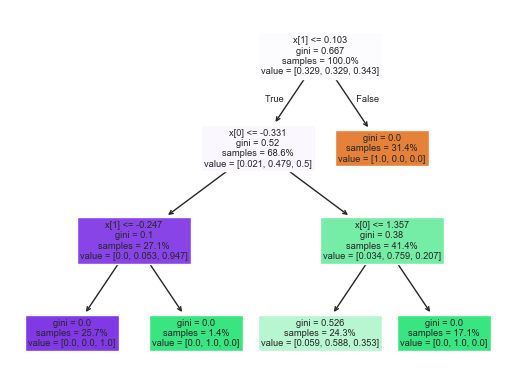

In [15]:
estimator = DecisionTreeClassifier(random_state = 1, max_depth = 3)
tree_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


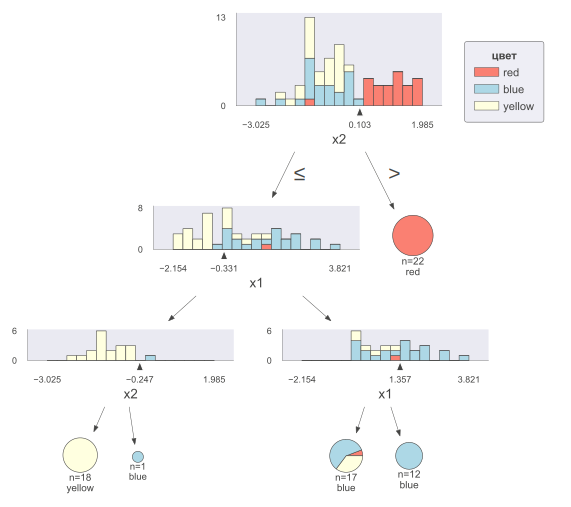

In [16]:
viz_model = dtreeviz.model(estimator,
                           X_train=X_train, y_train=y_train,
                           feature_names=['x1','x2'],
                           target_name = 'цвет', 
                           class_names=['red', 'blue', 'yellow']
                           )

viz_model.view(scale=1.5, colors = {'classes':colors_for_up_to_3_classes})

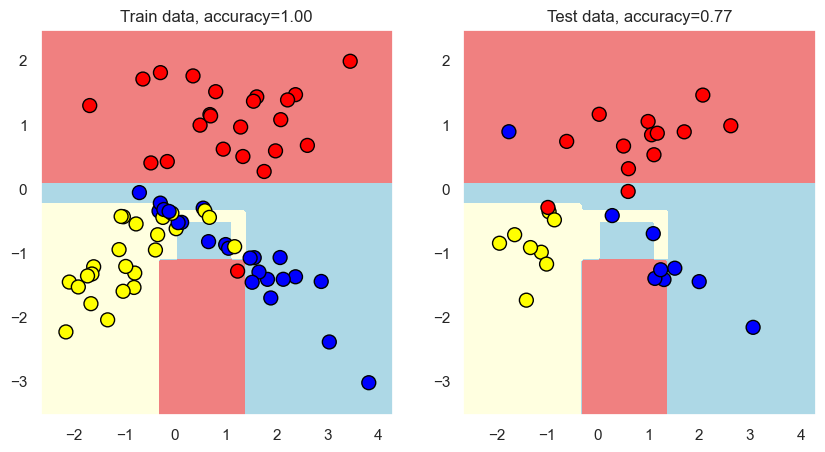

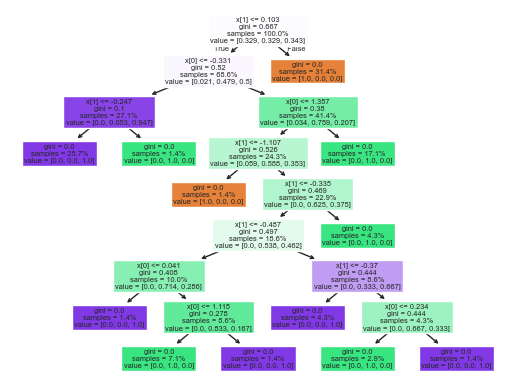

In [17]:
estimator = DecisionTreeClassifier(random_state = 1)
tree_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

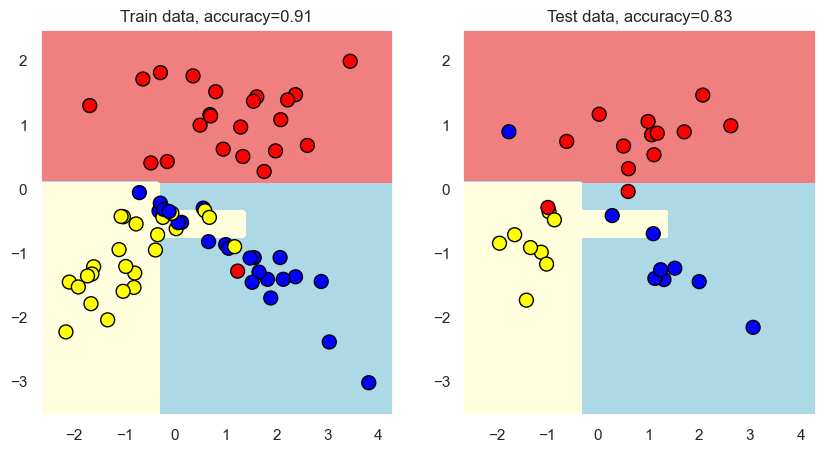

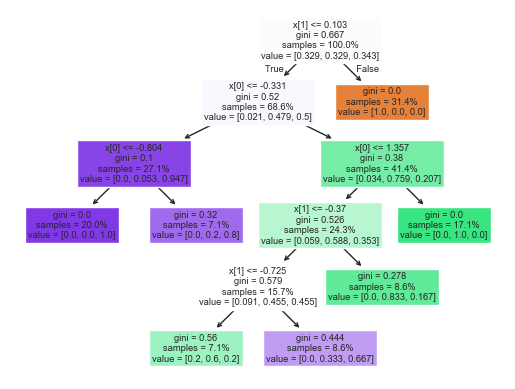

In [18]:
estimator = DecisionTreeClassifier(random_state = 1, min_samples_leaf = 5)
tree_decision_surface(estimator, X_train, y_train, X_test, y_test, colors, light_colors)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


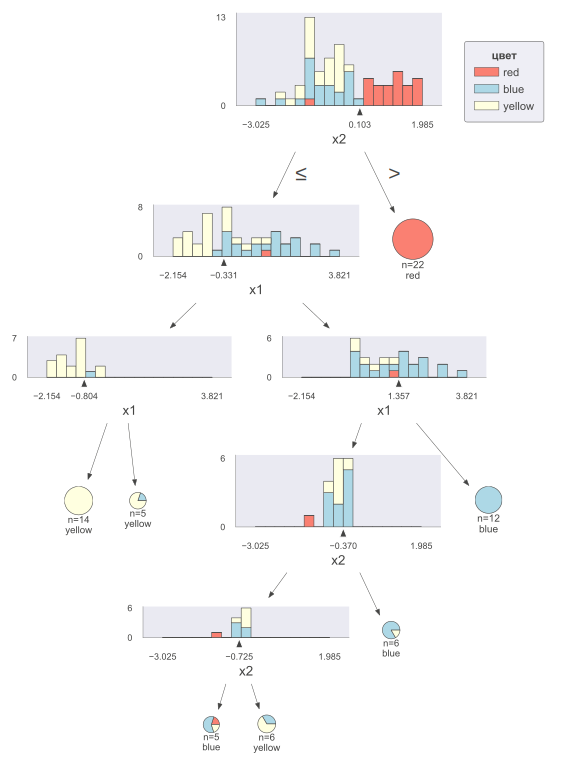

In [19]:
viz_model = dtreeviz.model(estimator,
                           X_train=X_train, y_train=y_train,
                           feature_names=['x1','x2'],
                           target_name = 'цвет', 
                           class_names=['red', 'blue', 'yellow']
                           )

viz_model.view(scale=1.5, colors = {'classes':colors_for_up_to_3_classes})

In [21]:
# conda install supertree
from supertree import SuperTree

super_tree = SuperTree(estimator, X_train, y_train, ['x1', 'x2'], ['red', 'blue', 'yellow'])
super_tree.show_tree()